# Example Plots

In [2]:
import sys
sys.path.insert(0, '../scripts')
sys.path.insert(0, '../data/database')
from sqlalchemy import create_engine
import parse_classification as classparser
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
engine =  create_engine('sqlite:///../data/database/happycows.db')
with engine.connect() as con:
    milk_volumes = pd.read_sql_table('milk_volume', con)
    weather = pd.read_sql_table('weather', con)
    classification = pd.read_sql_table('classification', con)

## Plot Example: Histogram

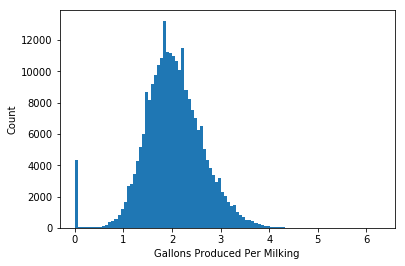

In [4]:
gallons = milk_volumes['milk_weight'].dropna() / 8.25
bin_edges = [x * 0.25 for x in range(20)]
_ = plt.hist(gallons, bins=100)
_ = plt.xlabel('Gallons Produced Per Milking')
_ = plt.ylabel('Count')
plt.show()

## Plot Example: Bee Swarm Plot

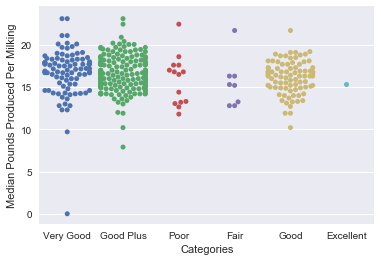

In [5]:
animals = classification[['animal_id', 'category']].dropna()
median_milk = milk_volumes[['date', 'animal_id', 'milk_weight']].dropna().groupby('animal_id').median().reset_index()
merged = pd.merge(left=animals, right=median_milk, left_on='animal_id', right_on='animal_id')

sns.set()
_ = sns.swarmplot(x='category', y='milk_weight', data=merged)
_ = plt.xlabel('Categories')
_ = plt.ylabel('Median Pounds Produced Per Milking')
plt.show()

## Plot Example: Empirical Cumulative Distribution Function (ECDF)

In [6]:
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, 1 + n) / n

    return x, y

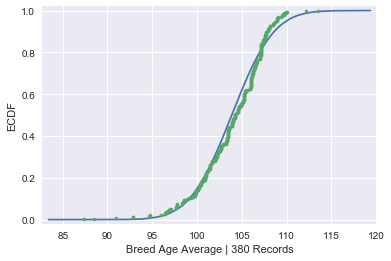

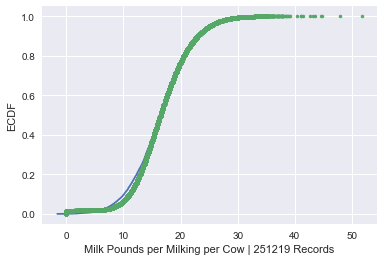

In [8]:
# Plot Type: Empirical Cumulative Distribution Function (ECDF)
c = classification.set_index(['animal_id', 'date'])
sns.set()

# ECDF of Breed Age Average
baa = c['breed_age_average'].dropna()
baa = baa[baa < 150]

baa_mu = np.mean(baa)
baa_sigma = np.std(baa)
baa_normal = np.random.normal(baa_mu, baa_sigma, 100000)

x_baa_theor, y_baa_theor = ecdf(baa_normal)
x_baa, y_baa = ecdf(baa)

_ = plt.plot(x_baa_theor, y_baa_theor)
_ = plt.plot(x_baa, y_baa, marker='.', linestyle='none')
_ = plt.xlabel(f'Breed Age Average | {len(x_baa)} Records')
_ = plt.ylabel('ECDF')
plt.margins(0.02) # Ensure data points not on edges of chart
plt.show()

# ECDF of Milk Weights
m = milk_volumes['milk_weight'].dropna()

milk_mu = np.mean(m)
milk_sigma = np.std(m)
m_normal = np.random.normal(milk_mu, milk_sigma, 10000)

x_milk, y_milk = ecdf(m)
x_theor, y_theor = ecdf(m_normal)

_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x_milk, y_milk, marker = '.', linestyle='none')
_ = plt.xlabel(f'Milk Pounds per Milking per Cow | {len(x_milk)} Records')
_ = plt.ylabel('ECDF')
plt.show()

## Plot Example: Comparing ECDFs on a single plot

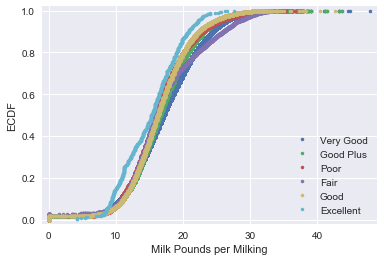

In [58]:
# Plot multiple ECDFs on same plot
a = classification[['animal_id', 'category']]
m = milk_volumes[['animal_id', 'milk_weight']]
milk_and_category = pd.merge(left=a, right=m, left_on='animal_id', right_on='animal_id')
milk_and_category = milk_and_category.drop(labels='animal_id', axis='columns')
           
legend = []
for category in list(milk_and_category['category'].unique()):
    records = milk_and_category[milk_and_category['category'] == category]['milk_weight']
    x_milk, y_milk = ecdf(records)
    _ = plt.plot(x_milk, y_milk, marker='.', linestyle='none')
    legend.append(category)

plt.legend(legend, loc='lower right')
_ = plt.xlabel('Milk Pounds per Milking')
_ = plt.ylabel('ECDF')
_ = plt.margins(0.02)
plt.show()

## Plot Example: Box Plot

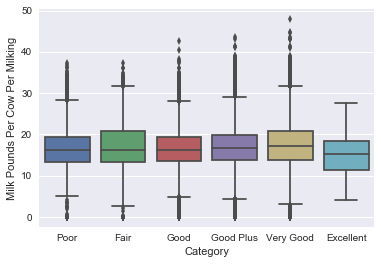

In [67]:
a = classification[['animal_id', 'category']]
m = milk_volumes[['animal_id', 'milk_weight']]
milk_and_category = pd.merge(left=a, right=m, left_on='animal_id', right_on='animal_id')
milk_and_category = milk_and_category.drop(labels='animal_id', axis='columns')

custom_order = ['Poor', 'Fair', 'Good', 'Good Plus', 'Very Good', 'Excellent']
sns.set()
_ = sns.boxplot(x='category', y='milk_weight', data=milk_and_category, order=custom_order)
_ = plt.xlabel('Category')
_ = plt.ylabel('Milk Pounds Per Cow Per Milking')
plt.show()

## Plot Example: Scatter Plot

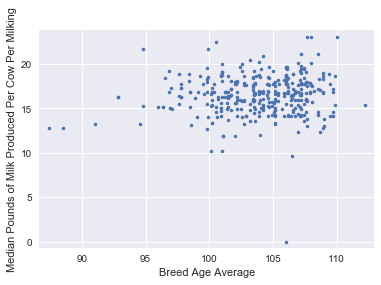

In [96]:
b = classification[['animal_id', 'breed_age_average']]
b = b[b['breed_age_average'] < 150] # 
m = milk_volumes[['milk_weight', 'animal_id']].groupby(milk_volumes['animal_id']).median()
milk = pd.merge(left=b, right=m, left_on='animal_id', right_on='animal_id')

_ = plt.plot(milk['breed_age_average'], milk['milk_weight'], marker='.', linestyle='none')
_ = plt.margins(0.03)
_ = plt.xlabel('Breed Age Average')
_ = plt.ylabel('Median Pounds of Milk Produced Per Cow Per Milking')
plt.show()

## Calculation Example: Variance

In [110]:
def variance(x):
    """Returns the variance of an array"""
    differences = x - np.mean(x)
    diff_sq = differences ** 2
    return np.mean(diff_sq)

ex_variance = variance(milk['milk_weight'])
np_variance = np.var(milk['milk_weight'])
print(ex_variance, np_variance)

5.070651827420781 5.070651827420781


## Calculation Example: Pearson Correlation Coefficient

In [109]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat = np.corrcoef(x, y)

    # Return entry [0,1]
    return corr_mat[0,1]

pearson_corrcoef = pearson_r(milk['breed_age_average'], milk['milk_weight'])
print(pearson_corrcoef)

0.109991777068
